<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Deep_Learning_Assignments/blob/main/Assignment_3/Numpy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook consists of the following implemented using Numpy:

- 3 layer neural network 
- 2 variable based non linear equation(quadratic non linear equation)
- also 3 variable based non linear equation(cubic non linear equation)
- Relu for non-linear activation function, implemented chain rule based gradient propagation
- used appropriate number of neurons and epochs


In [ ]:
!pip install --upgrade umap-learn
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

Part A : 3 layer Neural network for non-linear regression from scratch using Numpy

Plotting 3d non linear quadratic data. Weights as 5, 7.

n denotes number of input data points

d denotes dimension

x is the set random n number of points generated in d dimensions

calculating actual values of y as y_true using x, actuals weights and bias

plotting x and y

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


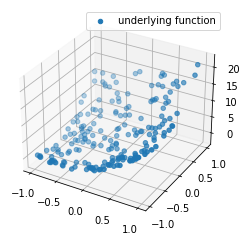

In [ ]:
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 7],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
#print(x**2)
#print("wt true")
#print(weights_true)
#print("y true")
#print(y_true)
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Using Gradient descent and mean sum of square errors to calculate the loss and gradient, to update the weights and bias such that loss is minized

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

First the weights and bias are initialized to a random value

Then calculate output by multiplying input with weights and adding bias

In backward function, the weights gradient and bias gradient are calculated based on the gradient values calculated

The weights and bias values are then updated in the update method


In [ ]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Training with linear function

Using the linear function to train the non-linear data results in the loss being high, because the linear function is incapable of representing the this data

Epoch 0, loss 48.66068060407293
Epoch 1, loss 40.11184963237127
Epoch 2, loss 33.7849015267501
Epoch 3, loss 28.984950329425583
Epoch 4, loss 25.255811943845845
Epoch 5, loss 22.294761372659345
Epoch 6, loss 19.898180973422544
Epoch 7, loss 17.92684498870027
Epoch 8, loss 16.283694082124477
Epoch 9, loss 14.899561264881244
Epoch 10, loss 13.723965815139293
Epoch 11, loss 12.719142569159372
Epoch 12, loss 11.856141127506113
Epoch 13, loss 11.112253210032804
Epoch 14, loss 10.469295540826739
Epoch 15, loss 9.912446687160909
Epoch 16, loss 9.429445032946902
Epoch 17, loss 9.0100242703534
Epoch 18, loss 8.645506872439249
Epoch 19, loss 8.328504124382539
Epoch 20, loss 8.052689256298137
Epoch 21, loss 7.812621729260696
Epoch 22, loss 7.603608123285134
Epoch 23, loss 7.4215898517721675
Epoch 24, loss 7.263051028498719
Epoch 25, loss 7.12494184309194
Epoch 26, loss 7.004614142605467
Epoch 27, loss 6.899766814760811
Epoch 28, loss 6.808399178667823
Epoch 29, loss 6.728771011218758
Epoch 30, lo

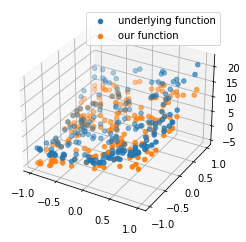

In [ ]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh. 
Model complex relationships between input and output variables and learn more complex patterns in data

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #to debug 
      #import pdb
      #pdb.set_trace() 
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


#relu = Relu()
#input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
#print(relu(input_))
#print(relu.backward(input_))

Performing just one step of:
- forward pass
- backward propagation

44.23300841412027


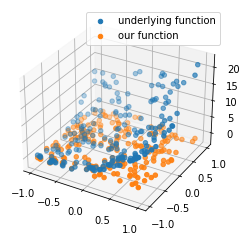

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(10 neurons) -> Hidden layer 2(10 neurons) -> Output layers

Number of epochs : 50



Epoch 0, loss 44.23300841412027
Epoch 1, loss 33.042241343587285
Epoch 2, loss 21.228950270539887
Epoch 3, loss 13.35005555988406
Epoch 4, loss 8.112802328218747
Epoch 5, loss 5.149605032349916
Epoch 6, loss 3.6313771042452494
Epoch 7, loss 2.784723339009153
Epoch 8, loss 2.3024052308405647
Epoch 9, loss 1.9972739609942947
Epoch 10, loss 1.787072457866665
Epoch 11, loss 1.6277784475443327
Epoch 12, loss 1.498006060927184
Epoch 13, loss 1.3868606194935023
Epoch 14, loss 1.2898581746843933
Epoch 15, loss 1.206007163936691
Epoch 16, loss 1.1321807944985829
Epoch 17, loss 1.067916662890682
Epoch 18, loss 1.0098255309311654
Epoch 19, loss 0.957604792719365
Epoch 20, loss 0.9110454377574234
Epoch 21, loss 0.8678277030298076
Epoch 22, loss 0.8289353986313577
Epoch 23, loss 0.7938817589927814
Epoch 24, loss 0.7613723757085588
Epoch 25, loss 0.7309068465023575
Epoch 26, loss 0.703452089106296
Epoch 27, loss 0.6777025628975821
Epoch 28, loss 0.6535471474074456
Epoch 29, loss 0.6305498020525674
E

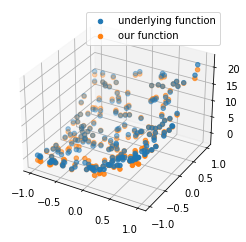

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=75)
plot_3d(x, y_true, model(x))

3 dimensions(cubic non linear equation)

x: (300, 3), weights: (3, 1), bias: (1,), y: (300, 1)


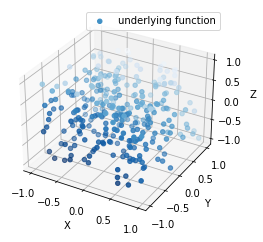

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import plotly.graph_objects as go

def plot_4d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.flatten(), cmap='Blues_r', label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.flatten(), cmap='Reds_r', label='our function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()

n = 300
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 5, 7]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)

3 layer Neural network for non-linear regression from scratch using Numpy

Plotting 3d non linear data(cubic data). Weights as 2, 5, 9.

n denotes number of input data points

d denotes dimension

x is the set random n number of points generated in d dimensions

calculating actual values of y as y_true using x, actuals weights and bias

plotting x and y

x: (300, 3), weights: (3, 1), bias: (1,), y: (300, 1)


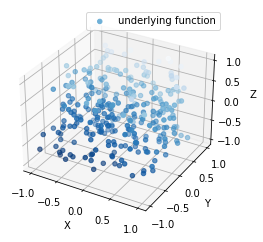

In [ ]:
n = 300
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 5, 7]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

#reducer = umap.UMAP(n_components=4)
#x_reduced = reducer.fit_transform(x)

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)


Using Gradient descent and mean sum of square errors to calculate the loss and gradient, to update the weights and bias such that loss is minized

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

First the weights and bias are initialized to a random value

Then calculate output by multiplying input with weights and adding bias

In backward function, the weights gradient and bias gradient are calculated based on the gradient values calculated

The weights and bias values are then updated in the update method


In [ ]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Training with linear function

Using the linear function to train the non-linear data results in the loss being high, because the linear function is incapable of representing the this data

Epoch 0, loss 160.597775424336
Epoch 1, loss 156.54959251864642
Epoch 2, loss 152.63818055095908
Epoch 3, loss 148.85834912065857
Epoch 4, loss 145.20511366900593
Epoch 5, loss 141.67368719218965
Epoch 6, loss 138.259472289659
Epoch 7, loss 134.95805353415142
Epoch 8, loss 131.76519015037823
Epoch 9, loss 128.6768089898609
Epoch 10, loss 125.68899778991681
Epoch 11, loss 122.7979987052814
Epoch 12, loss 120.00020210131824
Epoch 13, loss 117.29214059821875
Epoch 14, loss 114.67048335602185
Epoch 15, loss 112.1320305906955
Epoch 16, loss 109.67370831191981
Epoch 17, loss 107.2925632735885
Epoch 18, loss 104.9857581284112
Epoch 19, loss 102.75056677834834
Epoch 20, loss 100.58436991294492
Epoch 21, loss 98.48465072795146
Epoch 22, loss 96.44899081692952
Epoch 23, loss 94.47506622883417
Epoch 24, loss 92.56064368485085
Epoch 25, loss 90.70357694803629
Epoch 26, loss 88.90180333957406
Epoch 27, loss 87.15334039570742
Epoch 28, loss 85.45628265965172
Epoch 29, loss 83.80879860302011
Epoch 30

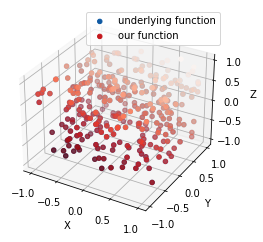

In [ ]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.01, num_epochs=250)
plot_4d(x, y_true, linear(x))

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh. 
Model complex relationships between input and output variables and learn more complex patterns in data

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #to debug 
      #import pdb
      #pdb.set_trace() 
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

Performing just one step of:
- forward pass
- backward propagation

127.45856908507305


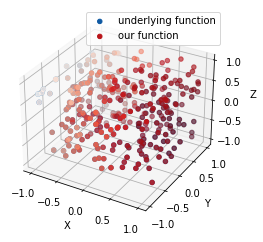

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 50, 50)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
#plot_3d(x, y_true, y_pred)
plot_4d(x, y_true, y_pred)

Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(30 neurons) -> Hidden layer 2(30 neurons) -> Output layers

Number of epochs : 300

learning rate : 0.01

The objective is to minimize error, and here we see that the error is converging towards 0.


Epoch 0, loss 127.45856908507305
Epoch 1, loss 103.3380851232599
Epoch 2, loss 82.18440665371304
Epoch 3, loss 64.82436735055701
Epoch 4, loss 49.85615241277639
Epoch 5, loss 37.59878533288306
Epoch 6, loss 28.377353471285435
Epoch 7, loss 22.03313794265096
Epoch 8, loss 17.801023319114087
Epoch 9, loss 14.980242050653402
Epoch 10, loss 13.070906698316332
Epoch 11, loss 11.694323949036498
Epoch 12, loss 10.65473792043474
Epoch 13, loss 9.835181523084769
Epoch 14, loss 9.180786504930806
Epoch 15, loss 8.643036160862966
Epoch 16, loss 8.193277869461754
Epoch 17, loss 7.810863487764018
Epoch 18, loss 7.482026035021848
Epoch 19, loss 7.199544403030383
Epoch 20, loss 6.952083449988528
Epoch 21, loss 6.730102209525239
Epoch 22, loss 6.522030910315714
Epoch 23, loss 6.3295939184060925
Epoch 24, loss 6.14465056003382
Epoch 25, loss 5.9728149906101455
Epoch 26, loss 5.813073361985013
Epoch 27, loss 5.663372997563409
Epoch 28, loss 5.523180473325411
Epoch 29, loss 5.391705444752018
Epoch 30, los

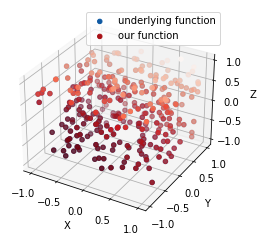

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=250)
plot_4d(x, y_true, model(x))